# 💲 Classifying the income of a person using Machine Learning Model


*In this Notebook we are going to predict whether the income of the person is less than or greater than the $ 50K.

## About the Data

* The data is taken from the UCI and and it is called Census Income Data.
    https://archive.ics.uci.edu/ml/datasets/census+income
    
* On the basis of 14 features given in the dataset we have to classify whether a person have income       below `$` 50K or above it. 

## Getting Our Data Ready

In [2]:
import pandas as pd

In [3]:
column_list=["age","workclass","fnlwgt","education","education-num",
             "marital-status","occupation","relationship","race","sex",
             "capital-gain","capital-loss","hours-per-week","native-country","Target"]
len(column_list)

15

In [11]:
train_data=pd.read_csv("adult.data",header=None,names=column_list)
test_data=pd.read_csv("adult.test",header=None,names=column_list)
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [12]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Let's check the datatype of columns.
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (tot

In [7]:
# Let's Check for the missing values.
train_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Target            0
dtype: int64

No missing Values in the training data found.

In [8]:
test_data.isna().sum()

age               0
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
Target            1
dtype: int64

Missing Value is Present in the test data.

In [14]:
test_data.dropna(inplace=True)
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [15]:
test_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Target            0
dtype: int64

No missing Value is Present Now.

## Visualising Our Trianing Data

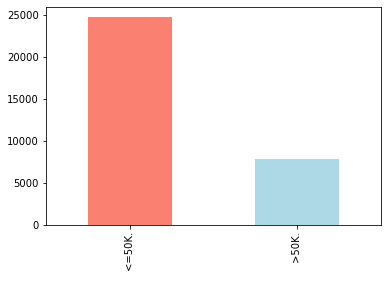

In [18]:
# Our Target Column
train_data.Target.value_counts().plot(kind="bar",color=["salmon",'lightblue']);


It is clear that our target column is slightly imbalanced

In [20]:
# Find the columns which contains string

for label, content in train_data.items():
    if pd.api.types.is_string_dtype(content):
        print("\"" + label + "\",")

"workclass",
"education",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"native-country",
"Target",


All of the above are categorical Columns

### For the Categorical Columns We will check their relations with the Target Columns

In [31]:
# Create a function to create a heatmap of crosstabs of different columns with Target Column.
import seaborn as sns
def create_heatmap(col,ax):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.heatmap(pd.crosstab(col,train_data.Target),
               annot=True,
               cmap="Blues",
               fmt='.2f')

In [76]:
categorical_columns=["workclass",
"education",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"native-country",
"Target"]
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Target']

In [77]:
len(categorical_columns)

9

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

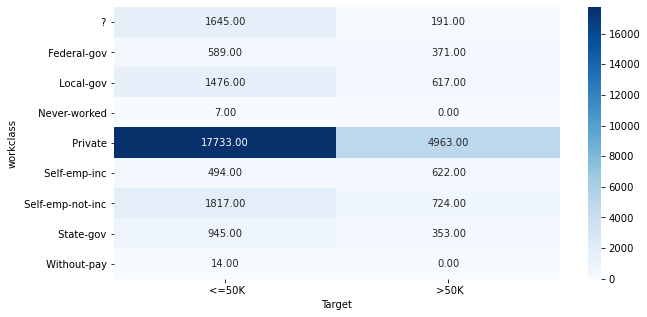

In [38]:
# fig,ax=plt.subplots(figsize=(10,5))
create_heatmap(train_data.workclass,ax=ax);

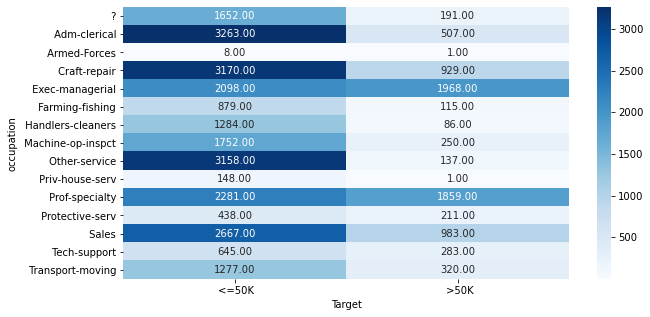

In [39]:
ax=create_heatmap(train_data.occupation,ax=ax);

In [41]:
train_data.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

`education` have inherent order in it. It should be considered as ordinal data.

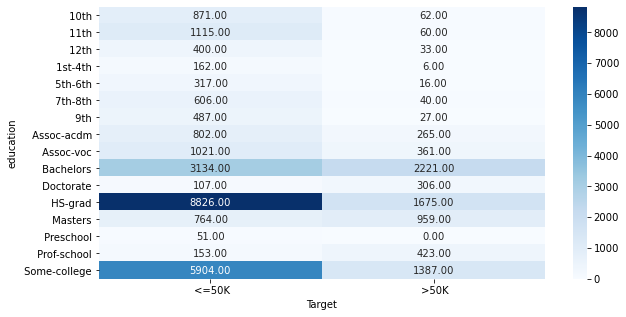

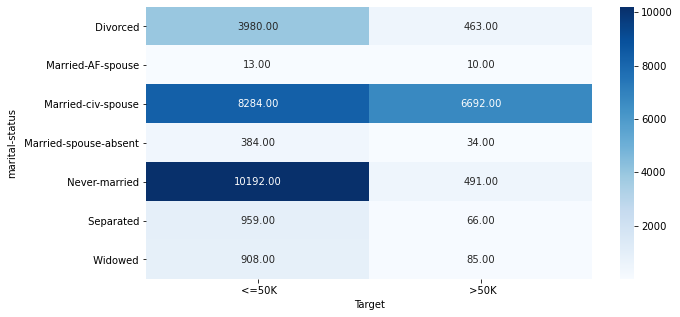

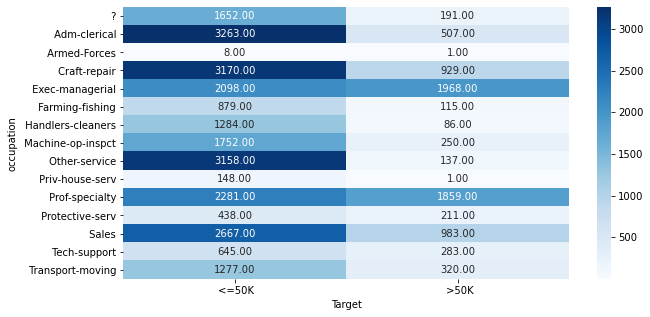

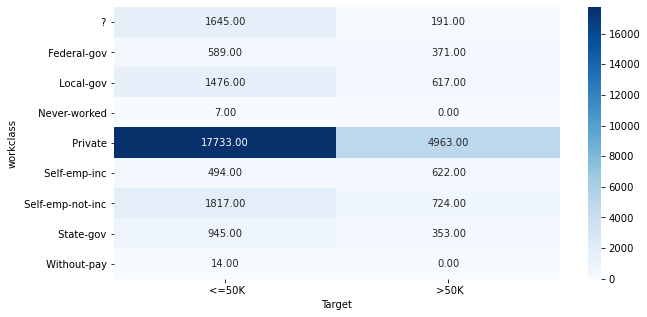

In [43]:

ax=create_heatmap(train_data.education,ax=ax);
ax=create_heatmap(train_data["marital-status"],ax=ax)
ax=create_heatmap(train_data.occupation,ax=ax);
ax=create_heatmap(train_data.workclass,ax=ax);



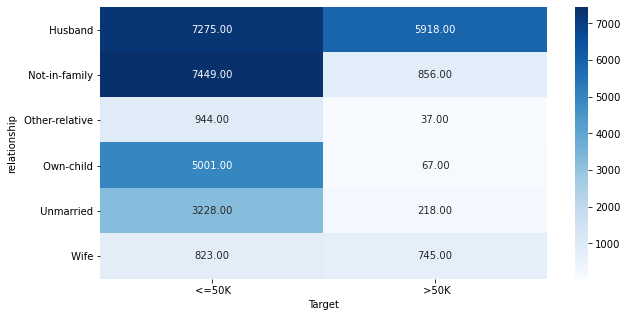

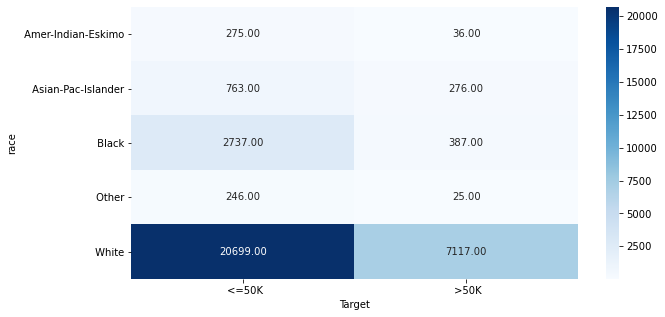

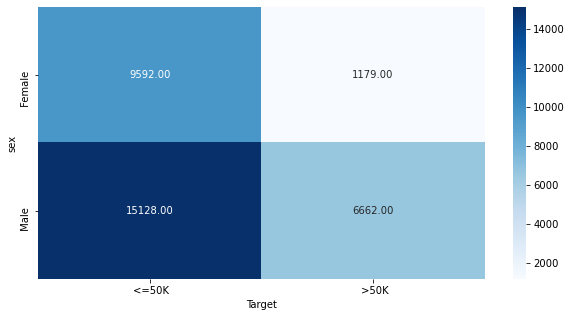

In [44]:
ax=create_heatmap(train_data.relationship,ax=ax);
ax=create_heatmap(train_data.race,ax=ax);
ax=create_heatmap(train_data.sex,ax=ax);


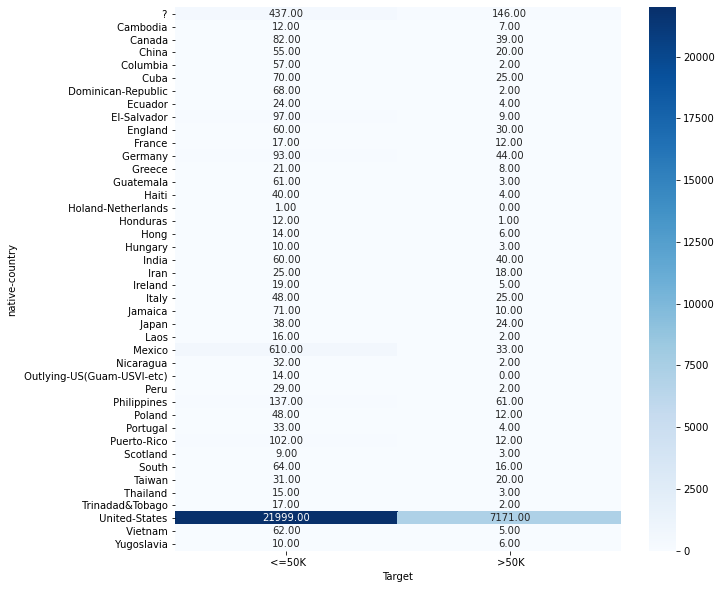

In [45]:
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(pd.crosstab(train_data["native-country"],train_data.Target),
              annot=True,
              fmt=".2f",
              cmap="Blues");

### Visualing Numerical Columns of Train and Test Data

In [46]:
for label, content in train_data.items():
    if not pd.api.types.is_string_dtype(content):
        print("\"" + label + "\",")

"age",
"fnlwgt",
"education-num",
"capital-gain",
"capital-loss",
"hours-per-week",


In [47]:
num_columns=["age",
"fnlwgt",
"education-num",
"capital-gain",
"capital-loss",
"hours-per-week"]

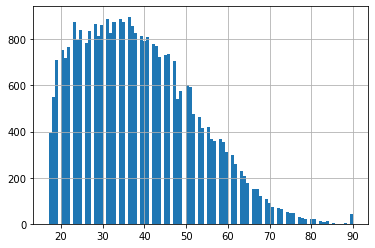

In [48]:
train_data.age.hist(bins=100);

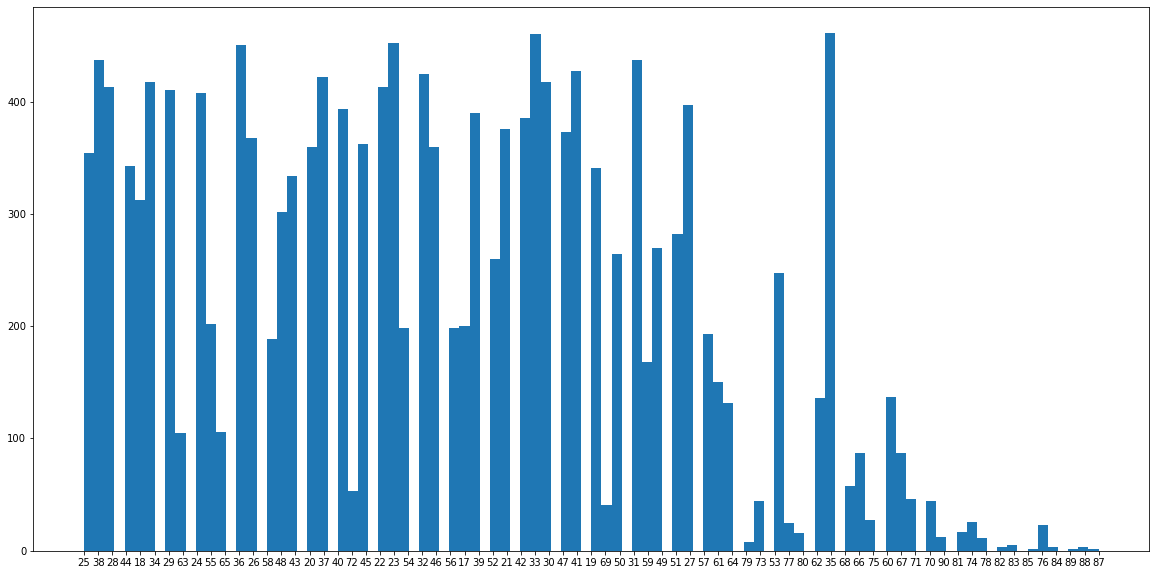

In [58]:
test_data.age.hist(bins=100,
                  grid=False,
                  figsize=(20,10));

In [49]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


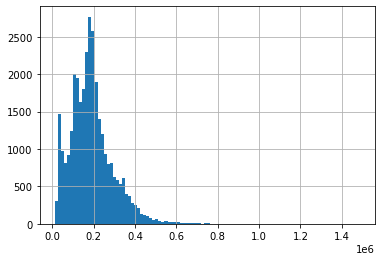

In [51]:
train_data.fnlwgt.hist(bins=100);

In [67]:
import numpy as np
len(np.unique(train_data.fnlwgt)),len(np.unique(test_data.fnlwgt))

(21648, 12787)

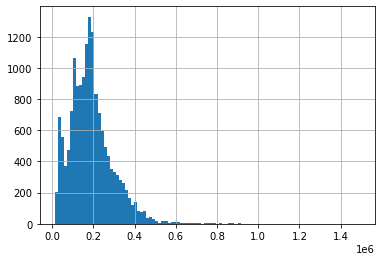

In [61]:
test_data.fnlwgt.hist(bins=100);

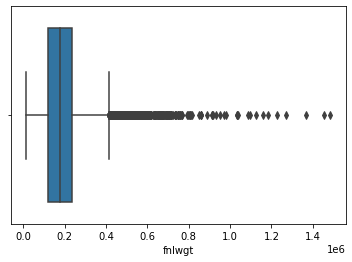

In [52]:
sns.boxplot(train_data.fnlwgt);

Contains Outliers

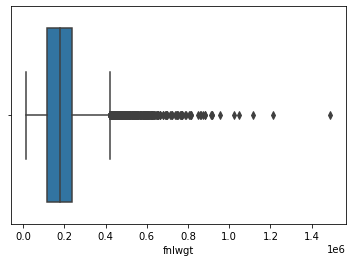

In [59]:
sns.boxplot(test_data.fnlwgt);

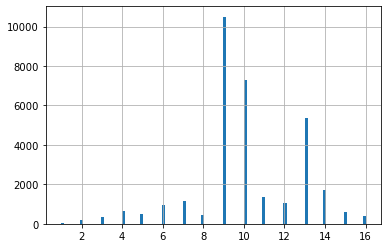

In [69]:
train_data["education-num"].hist(bins=100);

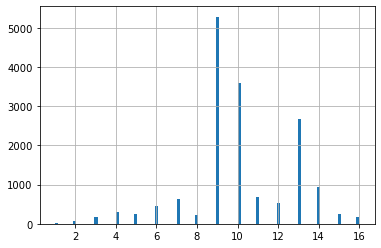

In [68]:
test_data["education-num"].hist(bins=100);

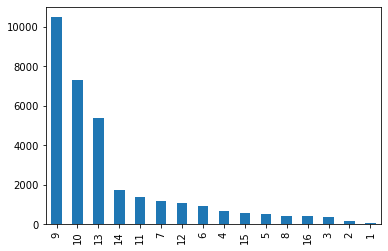

In [147]:
train_data["education-num"].value_counts().plot(kind="bar");

education-num will be trated as a categorical column

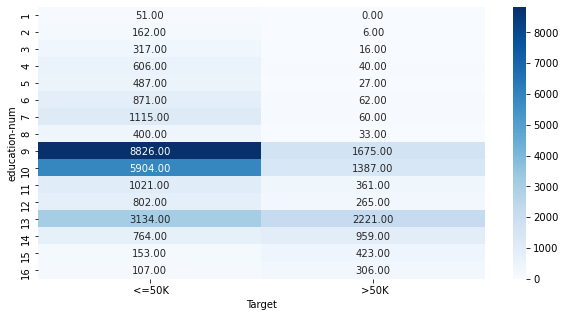

In [70]:
create_heatmap(train_data["education-num"],ax=ax);

In [71]:
num_columns


['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [72]:
train_data["capital-gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

In [73]:
train_data["capital-loss"].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, Length: 92, dtype: int64

In [74]:
train_data["hours-per-week"].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

* **Result of Numerical Column analysis** : education-num column should be trated as categorical column.

In [78]:
categorical_columns


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Target']

In [79]:
num_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [80]:
categorical_columns.append("education-num")


In [81]:
categorical_columns


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Target',
 'education-num']

In [82]:
num_columns.pop(2)

'education-num'

In [83]:
num_columns

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

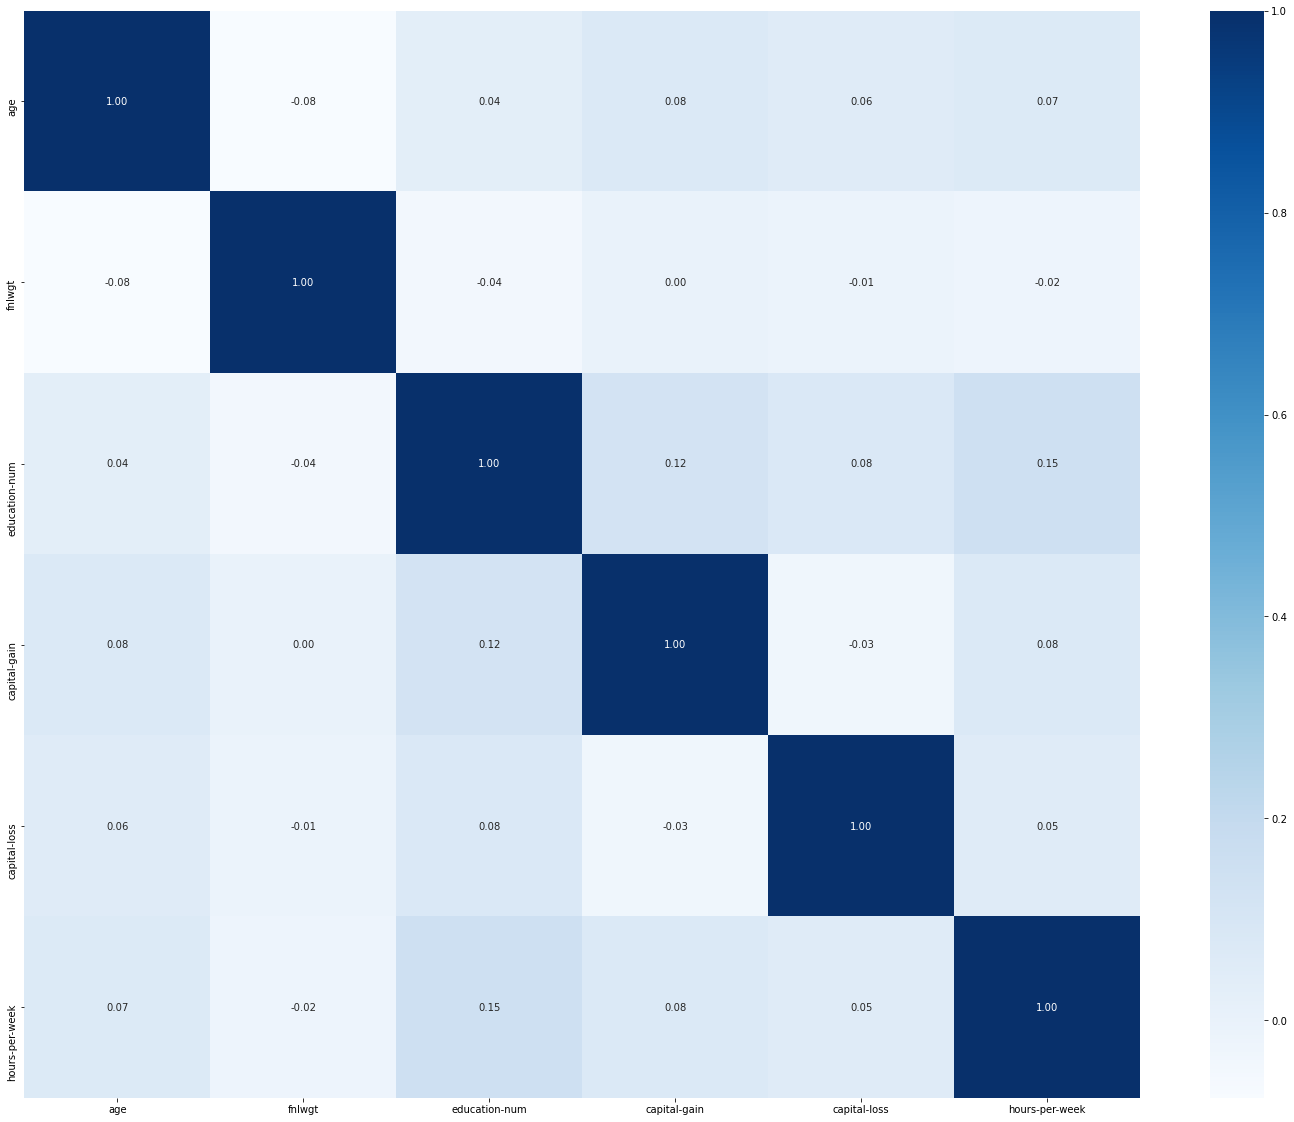

In [87]:
corr=train_data.corr()
fig,ax=plt.subplots(figsize=(25,20))
ax=sns.heatmap(corr,
           annot=True,
           fmt=".2f",
            cmap="Blues");

## Now, We have to convert our all Data into Numerical Format.

Let's see which column we have to transform into numerical.

In [84]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Target',
 'education-num']

**Ordinal Columns** :
* `edcation`.

In [85]:
len(categorical_columns)

10

**ENcoding Methods**:
    * Label or Ordinal Encoding for the `education` coulun.
    * OneHot encoding for the `sex`,`Target` columns.
    * BaseN Encoding for all other categorical columns.

In [96]:
ordinal_cat=["education"]
baseN_cat=['workclass','marital-status',
 'occupation',
 'relationship',
 'race',
 'native-country',
 'education-num']
onehot_cat=["sex","Target"]

In [131]:
train_df=train_data.copy()
test_df=test_data.copy()

In [134]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Ordinal Encoding of `education` column

In [141]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=["education"])`
transformed_train_df=encoder.fit_transform(train_df)

In [148]:
train_df=transformed_train_df
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,77516,1,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,1,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,2,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,3,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,1,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [145]:
encoder=ce.OrdinalEncoder(cols=["education"])
test_df=encoder.fit_transform(test_df)

In [146]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
1,25,Private,226802.0,1,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,2,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,3,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,4,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,4,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


### Binary Encoding of `sex` & `Target` column

In [149]:
binary_encoder=ce.BinaryEncoder(cols=["sex","Target"],return_df=True)
train_df=binary_encoder.fit_transform(train_df)
test_df=binary_encoder.fit_transform(test_df)

In [150]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_0,sex_1,capital-gain,capital-loss,hours-per-week,native-country,Target_0,Target_1
0,39,State-gov,77516,1,13,Never-married,Adm-clerical,Not-in-family,White,0,1,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,83311,1,13,Married-civ-spouse,Exec-managerial,Husband,White,0,1,0,0,13,United-States,0,1
2,38,Private,215646,2,9,Divorced,Handlers-cleaners,Not-in-family,White,0,1,0,0,40,United-States,0,1
3,53,Private,234721,3,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,1,0,0,40,United-States,0,1
4,28,Private,338409,1,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,0,40,Cuba,0,1


In [151]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_0,sex_1,capital-gain,capital-loss,hours-per-week,native-country,Target_0,Target_1
1,25,Private,226802.0,1,7.0,Never-married,Machine-op-inspct,Own-child,Black,0,1,0.0,0.0,40.0,United-States,0,1
2,38,Private,89814.0,2,9.0,Married-civ-spouse,Farming-fishing,Husband,White,0,1,0.0,0.0,50.0,United-States,0,1
3,28,Local-gov,336951.0,3,12.0,Married-civ-spouse,Protective-serv,Husband,White,0,1,0.0,0.0,40.0,United-States,1,0
4,44,Private,160323.0,4,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,1,7688.0,0.0,40.0,United-States,1,0
5,18,?,103497.0,4,10.0,Never-married,?,Own-child,White,1,0,0.0,0.0,30.0,United-States,0,1


### `BaseN Encoding` of remaining Columns

In [156]:
import category_encoders as ce
base5_encoder=ce.BaseNEncoder(cols=['workclass','marital-status','occupation','relationship','race',
                                    'native-country','education-num'],
                              return_df=True,
                              base=4)
train_df=base5_encoder.fit_transform(train_df)
test_df=base5_encoder.fit_transform(test_df)

In [157]:
train_df.head()

,age,workclass_0,workclass_1,workclass_2,fnlwgt,education,education-num_0,education-num_1,education-num_2,marital-status_0,...,sex_1,capital-gain,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,Target_0,Target_1
0,39,0,0,1,77516,1,0,0,1,0,...,1,2174,0,40,0,0,0,1,0,1
1,50,0,0,2,83311,1,0,0,1,0,...,1,0,0,13,0,0,0,1,0,1
2,38,0,0,3,215646,2,0,0,2,0,...,1,0,0,40,0,0,0,1,0,1
3,53,0,0,3,234721,3,0,0,3,0,...,1,0,0,40,0,0,0,1,0,1
4,28,0,0,3,338409,1,0,0,1,0,...,0,0,0,40,0,0,0,2,0,1


In [158]:
test_df.head()

,age,workclass_0,workclass_1,workclass_2,fnlwgt,education,education-num_0,education-num_1,education-num_2,marital-status_0,...,sex_1,capital-gain,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,Target_0,Target_1
1,25,0,0,1,226802.0,1,0,0,1,0,...,1,0.0,0.0,40.0,0,0,0,1,0,1
2,38,0,0,1,89814.0,2,0,0,2,0,...,1,0.0,0.0,50.0,0,0,0,1,0,1
3,28,0,0,2,336951.0,3,0,0,3,0,...,1,0.0,0.0,40.0,0,0,0,1,1,0
4,44,0,0,1,160323.0,4,0,1,0,0,...,1,7688.0,0.0,40.0,0,0,0,1,1,0
5,18,0,0,3,103497.0,4,0,1,0,0,...,0,0.0,0.0,30.0,0,0,0,1,0,1


## Feature Selection

### Correlation Metrics

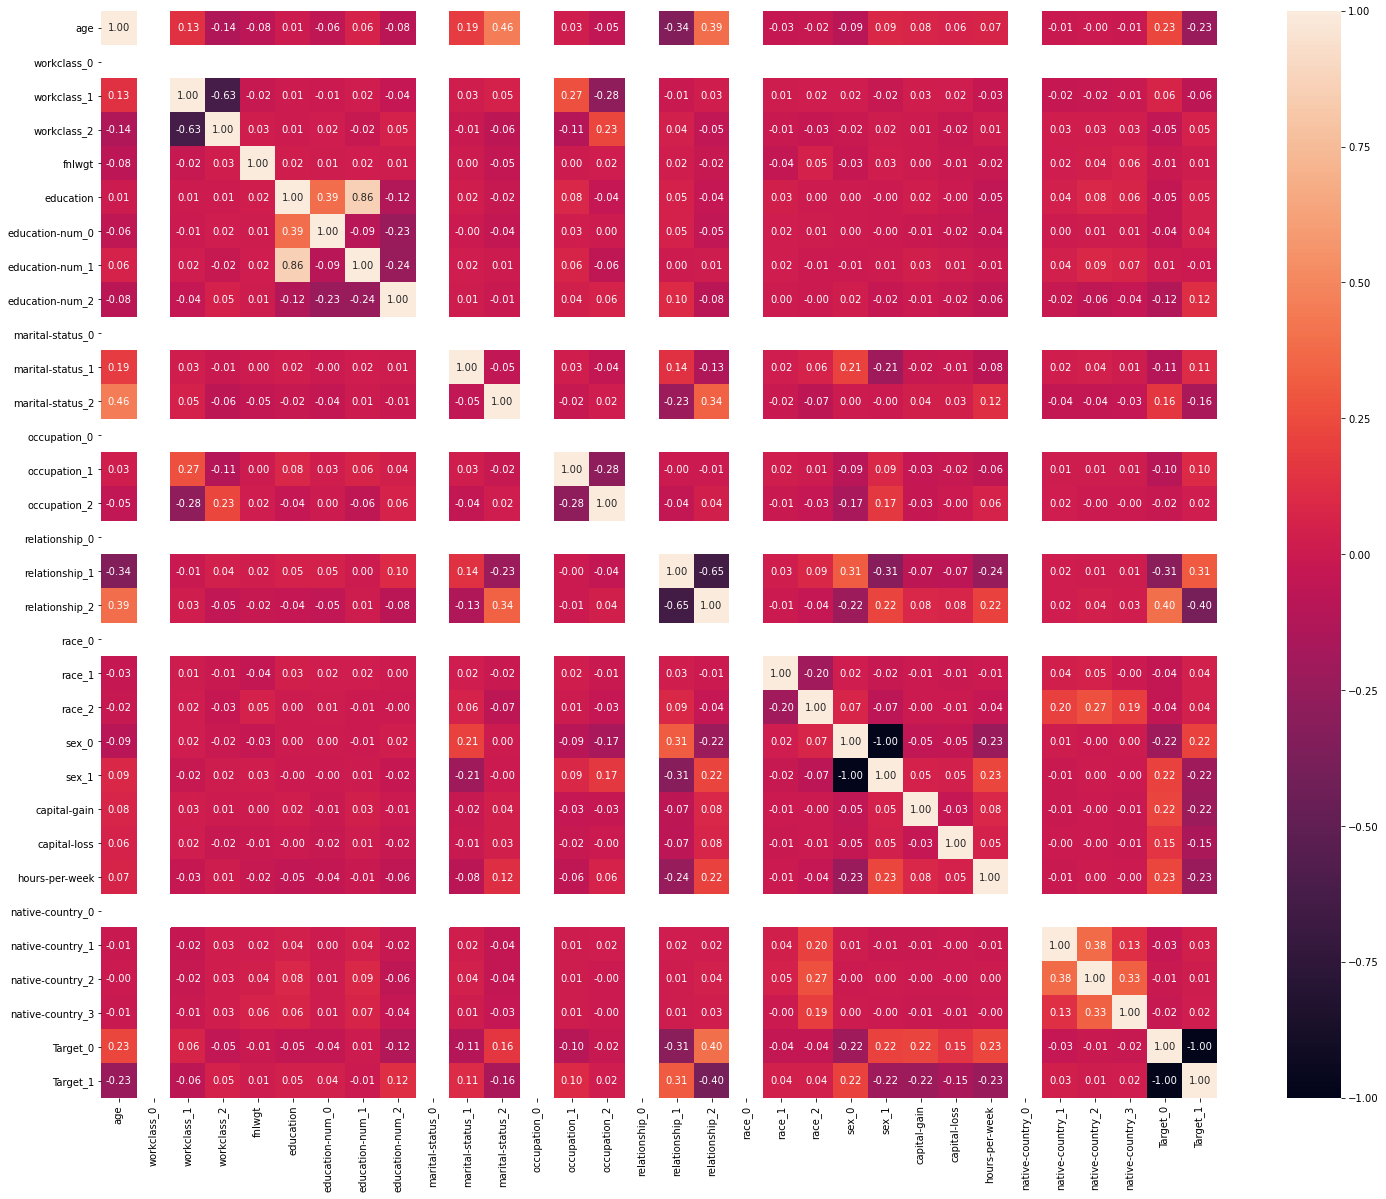

In [159]:
corr=train_df.corr()
fig,ax=plt.subplots(figsize=(25,20))
ax=sns.heatmap(corr,
           annot=True,
           fmt=".2f");

It is clear from the correlation metrics that column `workclass_0,marital-status_0,occupation_0,relationship_0,race_0,native-country` need to be dropped from x_train_df.

In [161]:
train_df.drop(columns=["workclass_0","marital-status_0","occupation_0",
                       "relationship_0","race_0","native-country_0"],
              axis=1,inplace=True)
train_df

,age,workclass_1,workclass_2,fnlwgt,education,education-num_0,education-num_1,education-num_2,marital-status_1,marital-status_2,...,sex_0,sex_1,capital-gain,capital-loss,hours-per-week,native-country_1,native-country_2,native-country_3,Target_0,Target_1
0,39,0,1,77516,1,0,0,1,0,1,...,0,1,2174,0,40,0,0,1,0,1
1,50,0,2,83311,1,0,0,1,0,2,...,0,1,0,0,13,0,0,1,0,1
2,38,0,3,215646,2,0,0,2,0,3,...,0,1,0,0,40,0,0,1,0,1
3,53,0,3,234721,3,0,0,3,0,2,...,0,1,0,0,40,0,0,1,0,1
4,28,0,3,338409,1,0,0,1,0,2,...,1,0,0,0,40,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,3,257302,7,0,1,3,0,2,...,1,0,0,0,38,0,0,1,0,1
32557,40,0,3,154374,2,0,0,2,0,2,...,0,1,0,0,40,0,0,1,1,0
32558,58,0,3,151910,2,0,0,2,1,3,...,1,0,0,0,40,0,0,1,0,1
32559,22,0,3,201490,2,0,0,2,0,1,...,0,1,0,0,20,0,0,1,0,1


In [162]:
test_df.drop(columns=["workclass_0","marital-status_0","occupation_0",
                       "relationship_0","race_0","native-country_0"],
              axis=1,inplace=True)
test_df

,age,workclass_1,workclass_2,fnlwgt,education,education-num_0,education-num_1,education-num_2,marital-status_1,marital-status_2,...,sex_0,sex_1,capital-gain,capital-loss,hours-per-week,native-country_1,native-country_2,native-country_3,Target_0,Target_1
1,25,0,1,226802.0,1,0,0,1,0,1,...,0,1,0.0,0.0,40.0,0,0,1,0,1
2,38,0,1,89814.0,2,0,0,2,0,2,...,0,1,0.0,0.0,50.0,0,0,1,0,1
3,28,0,2,336951.0,3,0,0,3,0,2,...,0,1,0.0,0.0,40.0,0,0,1,1,0
4,44,0,1,160323.0,4,0,1,0,0,2,...,0,1,7688.0,0.0,40.0,0,0,1,1,0
5,18,0,3,103497.0,4,0,1,0,0,1,...,1,0,0.0,0.0,30.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,0,1,215419.0,8,0,2,0,1,0,...,1,0,0.0,0.0,36.0,0,0,1,0,1
16278,64,0,3,321403.0,2,0,0,2,0,3,...,0,1,0.0,0.0,40.0,0,0,1,0,1
16279,38,0,1,374983.0,8,0,2,0,0,2,...,0,1,0.0,0.0,50.0,0,0,1,0,1
16280,44,0,1,83891.0,8,0,2,0,1,0,...,0,1,5455.0,0.0,40.0,0,0,1,0,1


### Classification Feature Selection

#### Dividing Our Data into Train Test

In [176]:
x=train_df.drop(columns=["Target_0","Target_1"],axis=1)
y=train_df.iloc[:,-2:]
x_test=test_df.drop(columns=["Target_0","Target_1"],axis=1)
y_test=test_df.iloc[:,-2:]

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,
                                            test_size=0.2)

In [185]:
# # ANOVA feature selection for numeric input and categorical output
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# # generate dataset
# x, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# # define feature selection
# fs = SelectKBest(score_func=f_classif, k=2)
# # apply feature selection
# x_selected = fs.fit_transform(x, y)
# print(x_selected.shape)

## Balancing the imbalnced Training Data

Changing ours dataframes to array:

In [186]:
# Training DataFrames into arrays
x_train=x_train.values
y_train=y_train.values

# Validation DataFrames into arrays
x_val=x_val.values
y_val=y_val.values

# Test DataFrames into arrays
x_test=x_test.values
y_test=y_test.values


In [187]:
from imblearn.combine import SMOTEENN
sn=SMOTEENN(random_state=92)
sn.fit(x_train,y_train)
x_train,y_train=sn.fit_sample(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass classes=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


**Our Data is Balanced now.**

## Scaling our Data

In [188]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.fit_transform(x_val)
x_test=scaler.fit_transform(x_test)

## Model Selection and Training

In [224]:
# Evaluation Function
from sklearn.metrics import plot_precision_recall_curve,average_precision_score,accuracy_score
def evaluate(model,test_data=False):
    if test_data==False:
        y_preds=model.predict(x_val)
        plot_precision_recall_curve(model,x_val,y_val.argmax(axis=1))
        print(f"accuracy score: {accuracy_score(y_val.argmax(axis=1),y_preds)}")
        return average_precision_score(y_val.argmax(axis=1),y_preds)
    else:
        y_preds=model.predict(x_test)
        plot_precision_recall_curve(model,x_test,y_test.argmax(axis=1))
        print(f"accuracy score: {accuracy_score(y_test.argmax(axis=1),y_preds)}")
        return average_precision_score(y_test.argmax(axis=1),y_preds)
    

**Models To be used on Validation Data**:
    * `XGBClassifier`
    * `Naives Bayes Classifier`
    * `SVC`
    * `K-nearest Neighbours`
    * `RandomForestClassifier`

### Model 1 : `XGBClassifier`

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy score: 0.7825886688162137


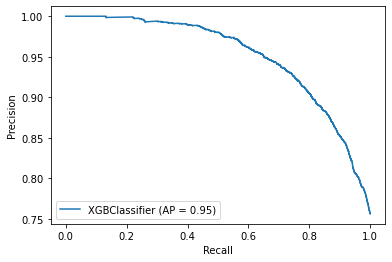

In [208]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier(verbosity=0,
                       random_state=92)
model_xgb.fit(x_train,y_train)
evaluate(model_xgb);

### Model 2: `Naives Bayes Classifier`

accuracy score: 0.57976354982343


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8456761015024388

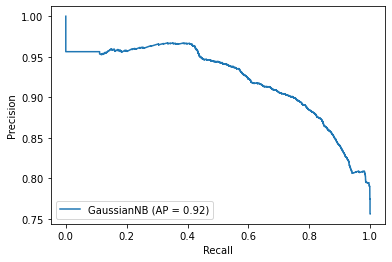

In [209]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)
evaluate(model_nb)

### Model 3: `SVC`

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy score: 0.6658989712881929


0.8682040974309395

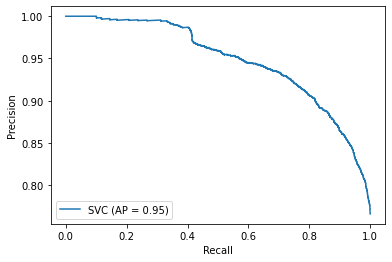

In [211]:
from sklearn import svm
model_svc=svm.SVC()
model_svc.fit(x_train,y_train)
evaluate(model_svc)

### Model 4: `KNN`

<ipython-input-213-8552552ef486>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_knn.fit(x_train,y_train)


accuracy score: 0.7627821280515892


0.8752623545813802

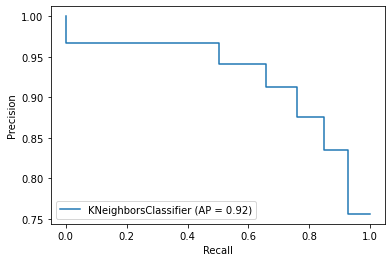

In [213]:
np.random.seed(0)
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
evaluate(model_knn)

### Model 5: `RandomForestClassifier`

<ipython-input-214-0b046e9c1a79>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(x_train,y_train)


accuracy score: 0.7767541839398127


0.8885940021339662

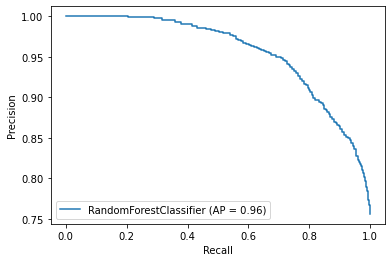

In [214]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(random_state=42)
model_rfc.fit(x_train,y_train)
evaluate(model_rfc)

Two best models so far are `XGBClassifier` and `RandomForestClassifier`

## Hyperparameter Tuning of the Best Models

### `XGBClassifier`

In [215]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [217]:
np.random.seed(42)
tuned_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }
clf = RandomizedSearchCV(tuned_xgb,
                         param_distributions = param_dist,
                         n_iter = 25,
                         scoring = 'roc_auc',
                         error_score = 0,
                         verbose = 3,
                         n_jobs = -1)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  3.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estima...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022BAF72B910>,
                                        'lear

In [218]:
clf.best_params_

{'colsample_bytree': 0.9249934326457544,
 'learning_rate': 0.08175654756298101,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 918,
 'subsample': 0.9495565690483858}

accuracy score: 0.7637033625057578


0.8844725786102224

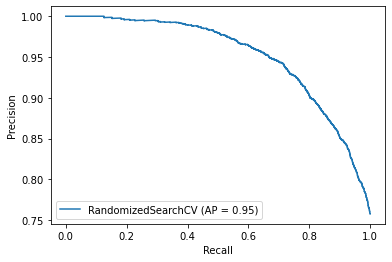

In [219]:
evaluate(clf)

### `RandomForestClassifier`

In [221]:
rf_grid={'bootstrap':[True],
 'max_depth': np.linspace(10, 110, num = 11),
 'max_features': ['auto','sqrt'],
 'min_samples_leaf': [1,2,4],
 'min_samples_split': [2,5,10],
 'n_estimators': [int(x) for x in np.linspace(200,2000,10)]}

np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
tuned_rf=RandomizedSearchCV(rf,
                           param_distributions=rf_grid,
                           n_iter=100,
                           verbose=2,
                           n_jobs=-1,
                           random_state=42,
                           cv=3)
tuned_rf.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.2min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

accuracy score: 0.7789037309995394


0.8856165313185382

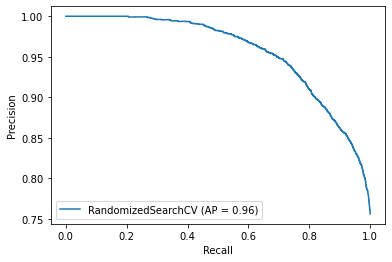

In [222]:
evaluate(tuned_rf)

## Prediction On Test Data

Test Set Evaluation With `XGBClassier`

accuracy score: 0.6177138996376144


0.8524180251403076

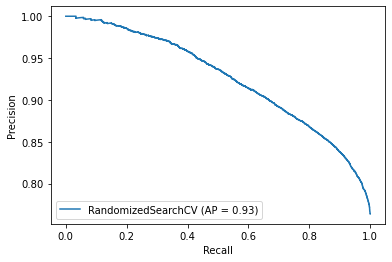

In [225]:
evaluate(clf,test_data=True)

In [227]:
len(clf.predict(x_test))

16281

accuracy score: 0.6301209999385787


0.8531487726324587

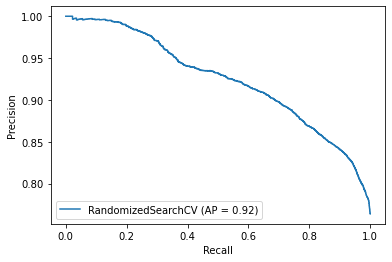

In [228]:
evaluate(tuned_rf,test_data=True)

## BEST MODEL  `XGBClassier`

Best Model For Our Data Set is XGBClassier with AP=0.93 on Test Data

In [256]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.argmax(axis=1),y_preds)

array([[3318,  528],
       [5696, 6739]], dtype=int64)

### Saving Our Model

In [257]:
import pickle
pickle.dump(clf, open("xgbclassifier_AP0.93_Tuned_Cesus_Income", 'wb'))

In [258]:
loaded_model=pickle.load(open("xgbclassifier_AP0.93_Tuned_Cesus_Income",'rb'))

# PROJECT FINISHED